In [118]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib
%matplotlib inline  

In [242]:
### Read Csv's and 

csv1 = pd.read_excel("Analytics_All_Web_Site_Data_AdWords_Search_Queries_20170615-20180302.xlsx",sheet_name="Dataset1")
csv2 = pd.read_excel("Analytics_All_Web_Site_Data_AdWords_Search_Queries_20170615-20180302_(1).xlsx",sheet_name="Dataset1")

# remove last row of summary statistics
csv1 = csv1.iloc[:-1]
csv2 = csv2.iloc[:-1]

df = csv1.append(csv2).reset_index().drop('index',axis=1)

In [243]:
df['Revenue/Session'] = df.Revenue /df.Sessions


In [244]:
df.shape

(8007, 13)

In [245]:
df = df[df.Clicks > 100] # Drop rows where clicks are less than 100

In [246]:
df = df[(df.Revenue > 1)] # Drop rows where clicks are less than 100

In [247]:
df2 = df[['Revenue/Session',"Pages / Session","Bounce Rate","Clicks",'Search Query']] # rearrange and select columns

In [248]:
df2 = df2.dropna() # drop NaN values

In [249]:
# X = df2.iloc[:,1:-1]  # Select Pages/sesion, Bounce Rate, Clicks
X = df2.iloc[:,1:-3]  # Select Pages/sesion, Bounce Rate

In [250]:
X = X.values

In [251]:
y = df2.iloc[:,:1]

In [252]:
Y = y.values

In [253]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [254]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [255]:
y_pred = regressor.predict(X_test)

In [256]:
y_pred = pd.DataFrame(y_pred)

In [257]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [267]:
result = pd.concat([y_test,y_pred],axis=1)

In [275]:
result.rename(index=str, columns={"Revenue/Session": "Actuals", 0: "Predictions"},inplace=True)

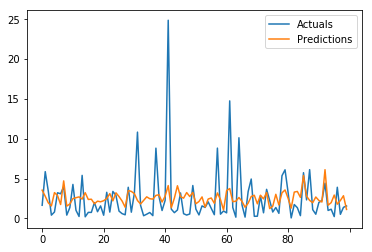

In [277]:
result.head(100).plot()